# Predicting Hotel Cancellations with K-Nearest Neighbors Machine Learning Algorithm

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [70]:
import pandas as pd
hotels = pd.read_csv("data/hotel_bookings.csv")
hotels

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


# Importing all of the packages.

In [71]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, mean_absolute_error, roc_auc_score, roc_curve, mean_squared_error, confusion_matrix
from matplotlib import pyplot as plt
import missingno as msno
from scipy.stats import pearsonr
import plotnine as p9
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [72]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [73]:
hotels.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,35862.000000,35951.000000,35908.000000,35468.00000,33683.000000,35803.000000,35897.000000,35771.000000,35294.000000,35689.000000,35778.000000,35725.000000,35815.000000,35486.000000
mean,1.845017,0.105366,0.810209,2.20331,0.030698,85.276569,2017.820431,7.424031,15.605712,0.025666,0.023646,0.154458,103.418207,0.619343
std,0.518652,0.402871,0.870857,1.40989,0.172501,85.998845,0.383834,3.068277,8.743484,0.158140,0.370835,1.764805,35.057342,0.785849
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.00000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.00000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.00000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.00000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


# Visualizing the data.

<AxesSubplot: >

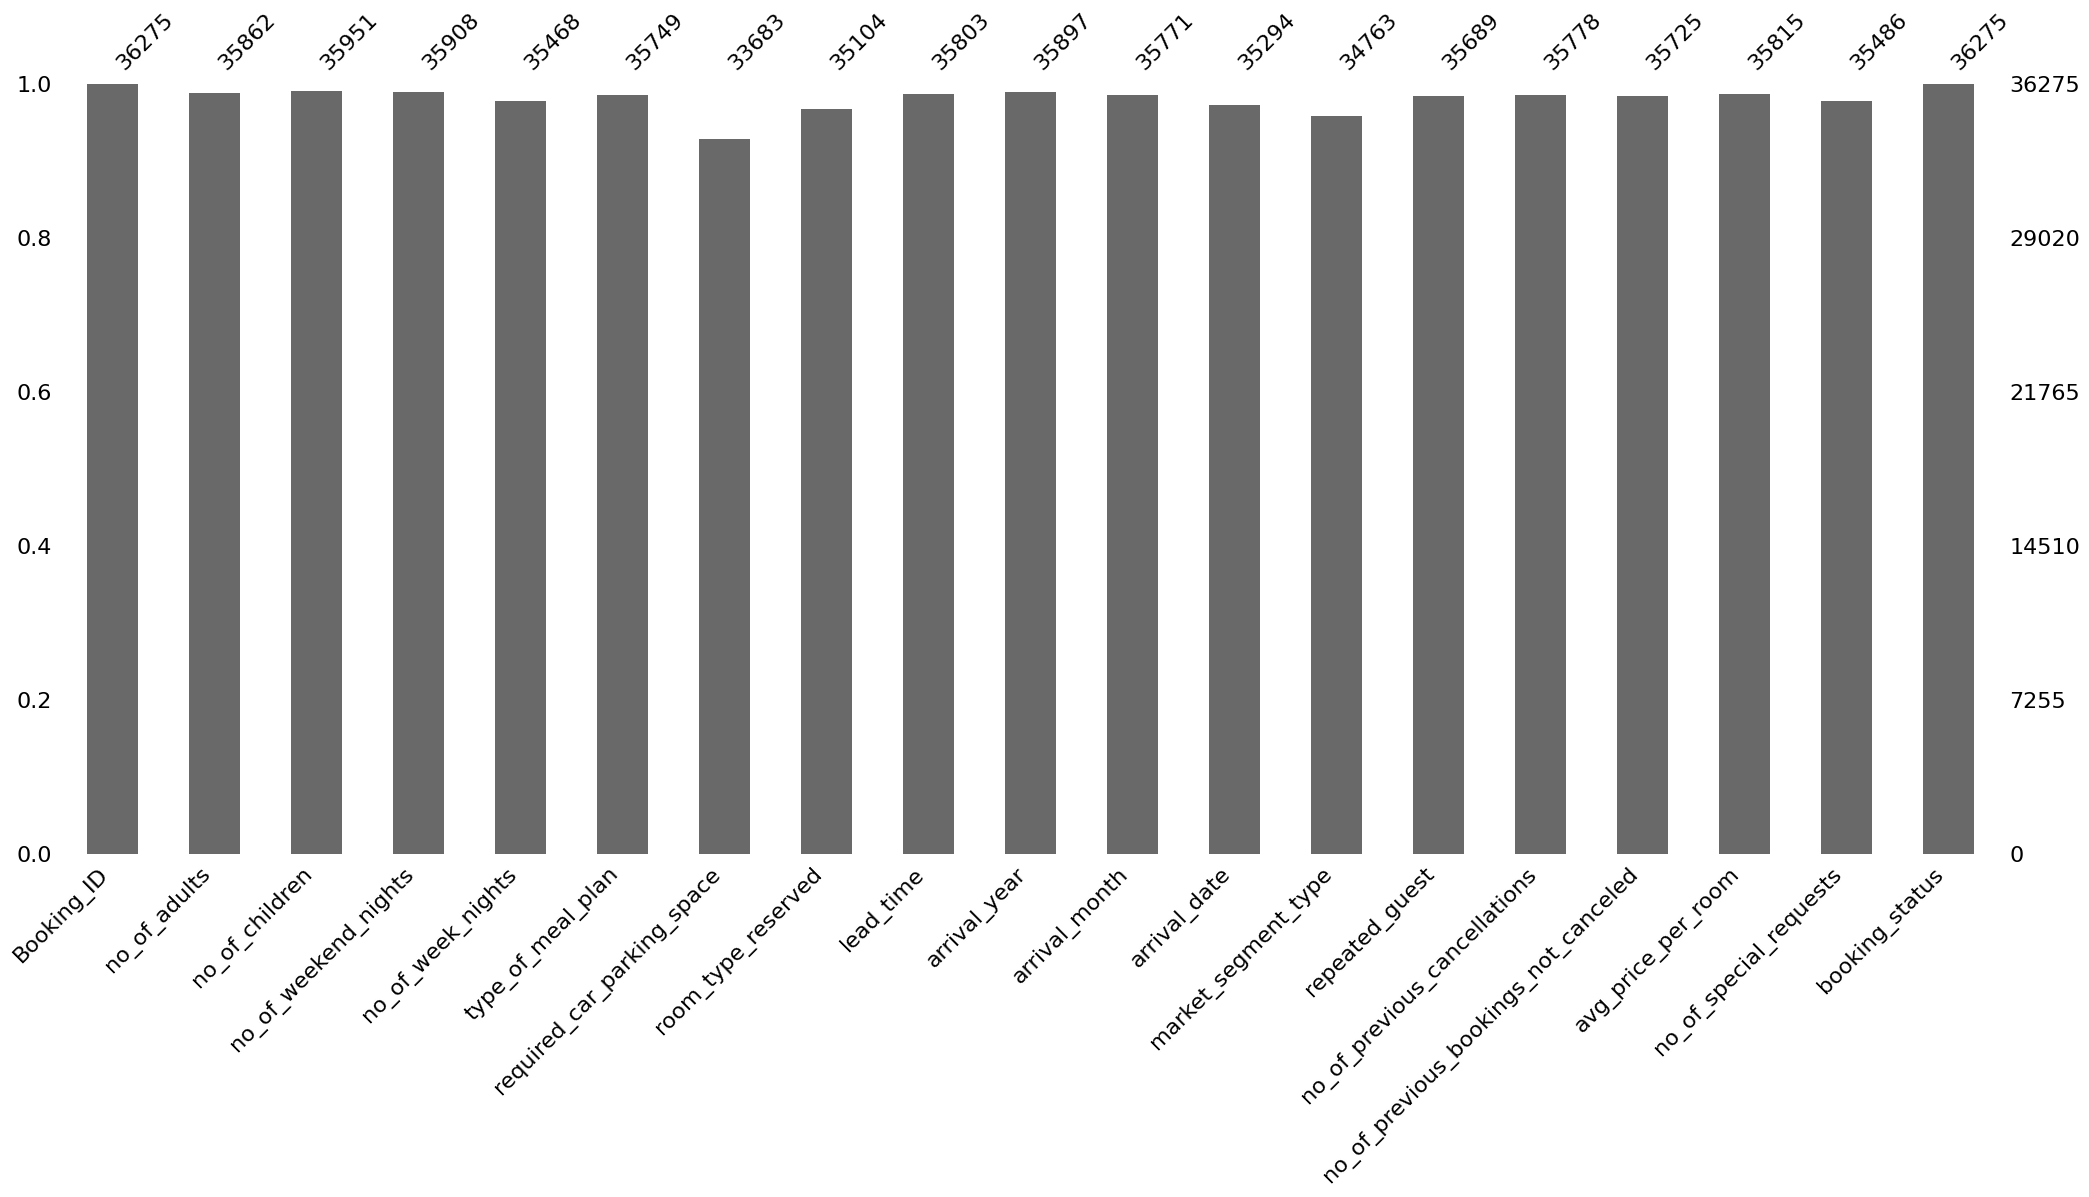

In [74]:
# Visualizing missing data.
msno.bar(hotels)

In [75]:
# Check for missing values
print(hotels.isna().any())

Booking_ID                              False
no_of_adults                             True
no_of_children                           True
no_of_weekend_nights                     True
no_of_week_nights                        True
type_of_meal_plan                        True
required_car_parking_space               True
room_type_reserved                       True
lead_time                                True
arrival_year                             True
arrival_month                            True
arrival_date                             True
market_segment_type                      True
repeated_guest                           True
no_of_previous_cancellations             True
no_of_previous_bookings_not_canceled     True
avg_price_per_room                       True
no_of_special_requests                   True
booking_status                          False
dtype: bool


In [76]:
# Remove rows with missing values
hotels.dropna(inplace=True)

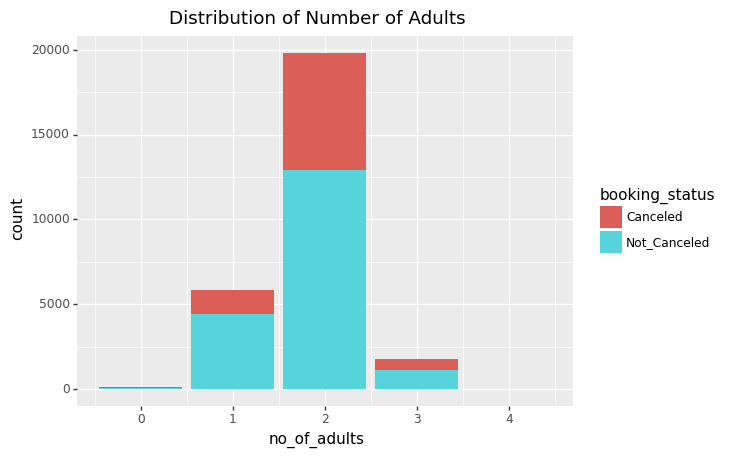

<ggplot: (8738799222839)>

In [77]:
p9.ggplot(hotels) + p9.aes(x='no_of_adults', fill='booking_status') + p9.geom_bar() + p9.labs(title='Distribution of Number of Adults')


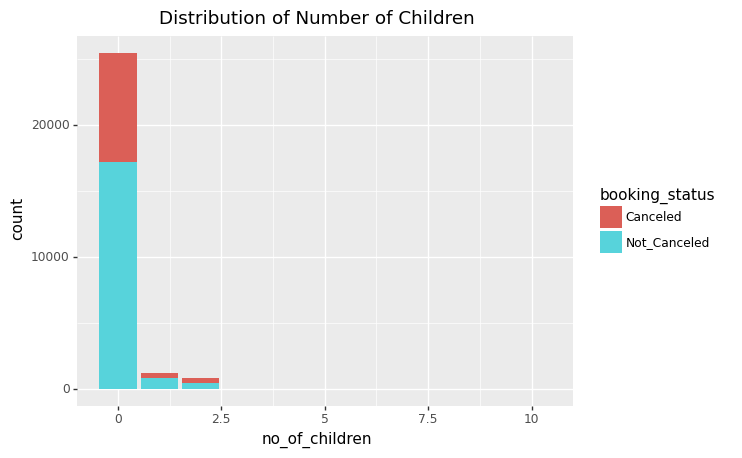

<ggplot: (8738875617561)>

In [78]:
p9.ggplot(hotels) + p9.aes(x='no_of_children', fill='booking_status') + p9.geom_bar() + p9.labs(title='Distribution of Number of Children')

There's a large imbalance in the number of children per booking.

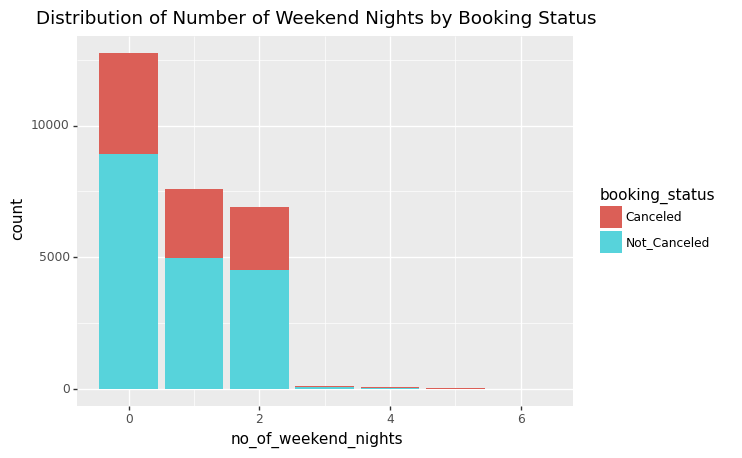

<ggplot: (8738799122017)>

In [79]:
p9.ggplot(hotels) + p9.aes(x='no_of_weekend_nights', fill='booking_status') + p9.geom_bar() + p9.labs(title='Distribution of Number of Weekend Nights by Booking Status')

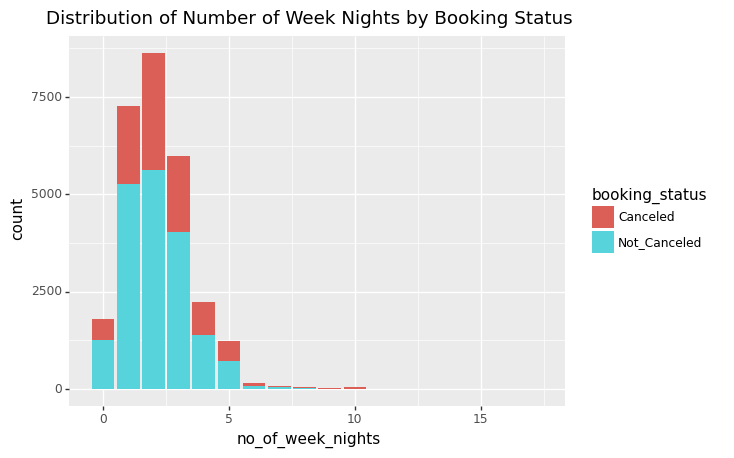

<ggplot: (8738799108349)>

In [80]:
p9.ggplot(hotels) + p9.aes(x='no_of_week_nights', fill='booking_status') + p9.geom_bar() + p9.labs(title='Distribution of Number of Week Nights by Booking Status')

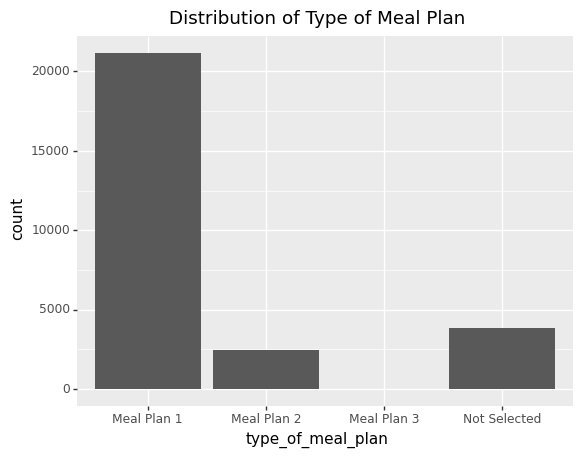

<ggplot: (8738799059197)>

In [81]:
p9.ggplot(hotels) + p9.aes(x='type_of_meal_plan') + p9.geom_bar() + p9.labs(title='Distribution of Type of Meal Plan')

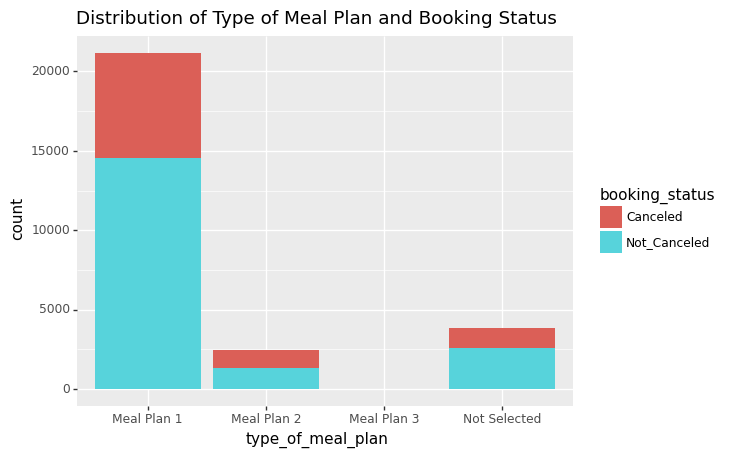

<ggplot: (8738799029402)>

In [82]:
p9.ggplot(hotels) + p9.aes(x='type_of_meal_plan', fill='booking_status') + p9.geom_bar() + p9.labs(title='Distribution of Type of Meal Plan and Booking Status')

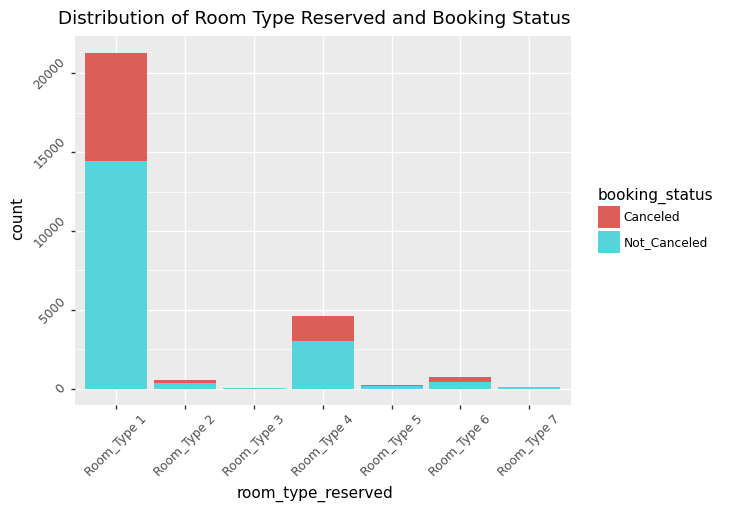

<ggplot: (8738799012316)>

In [83]:
p9.ggplot(hotels) + p9.aes(x='room_type_reserved', fill='booking_status') + p9.geom_bar() + p9.labs(title='Distribution of Room Type Reserved and Booking Status') + p9.theme(axis_text = p9.element_text(angle=45))

There is a large imbalance in the room types.

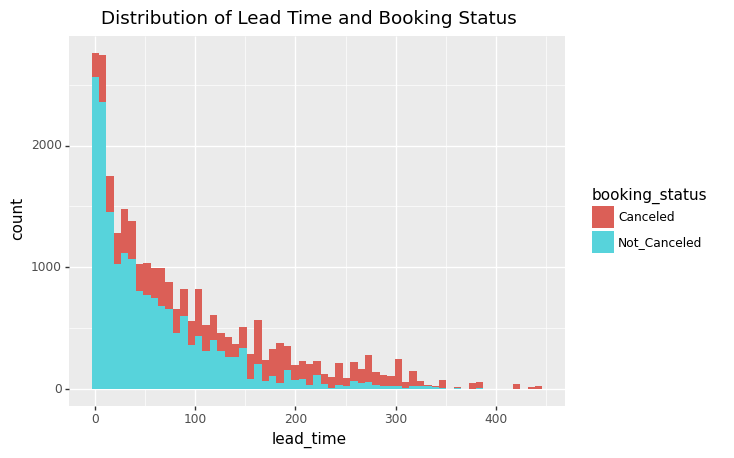

<ggplot: (8738799001835)>

In [84]:
p9.ggplot(hotels) + p9.aes(x='lead_time', fill='booking_status') + p9.geom_histogram() + p9.labs(title='Distribution of Lead Time and Booking Status')

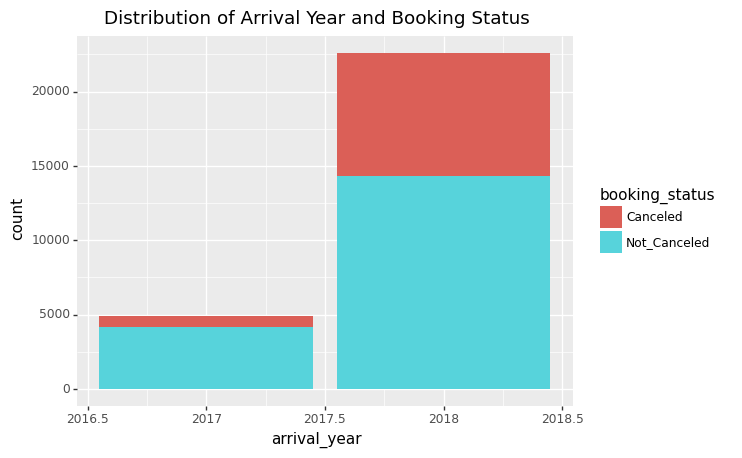

<ggplot: (8738799081665)>

In [85]:
p9.ggplot(hotels) + p9.aes(x='arrival_year', fill='booking_status') + p9.geom_bar() + p9.labs(title='Distribution of Arrival Year and Booking Status')

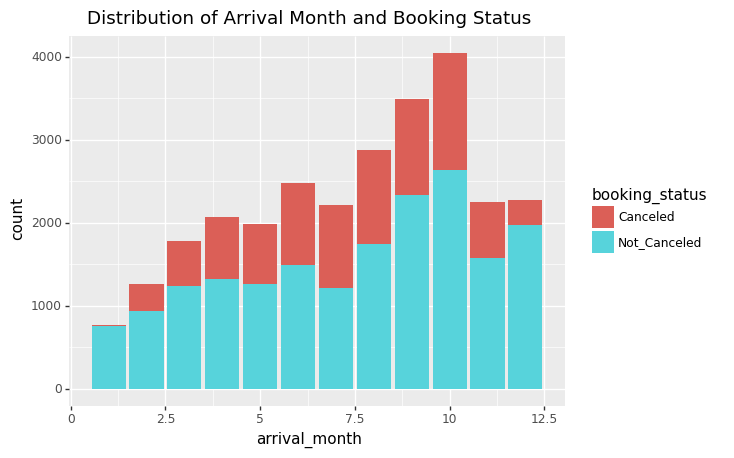

<ggplot: (8738798948151)>

In [86]:
p9.ggplot(hotels) + p9.aes(x='arrival_month', fill='booking_status') + p9.geom_bar() + p9.labs(title='Distribution of Arrival Month and Booking Status')

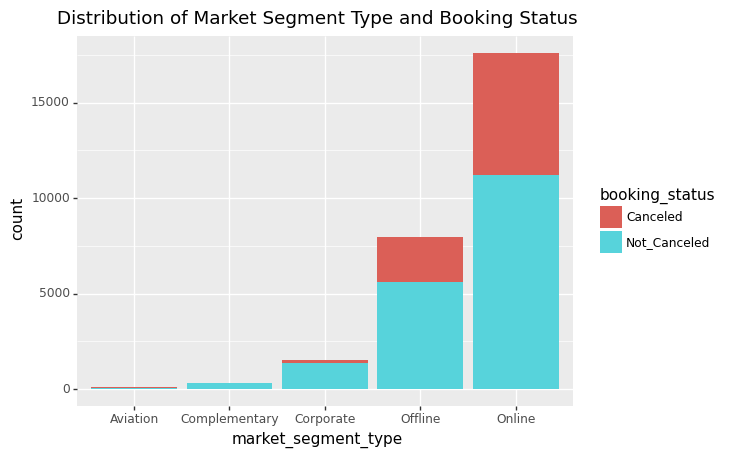

<ggplot: (8738798953024)>

In [87]:
p9.ggplot(hotels) + p9.aes(x='market_segment_type', fill='booking_status') + p9.geom_bar() + p9.labs(title='Distribution of Market Segment Type and Booking Status')

There is a large imbalance in market segment types.

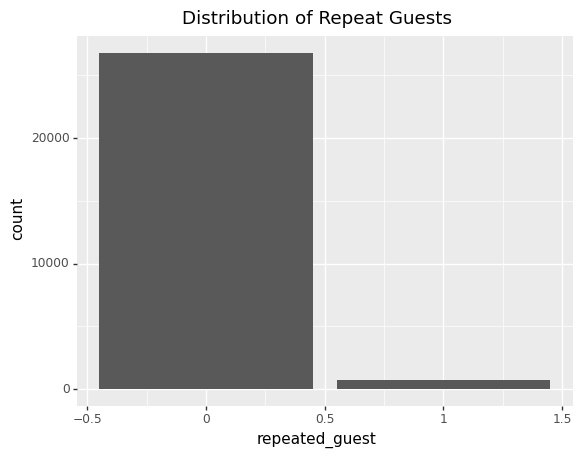

<ggplot: (8738798938685)>

In [88]:
p9.ggplot(hotels) + p9.aes(x='repeated_guest') + p9.geom_bar() + p9.labs(title='Distribution of Repeat Guests')

There is a large imbalance in repeated guest groups.

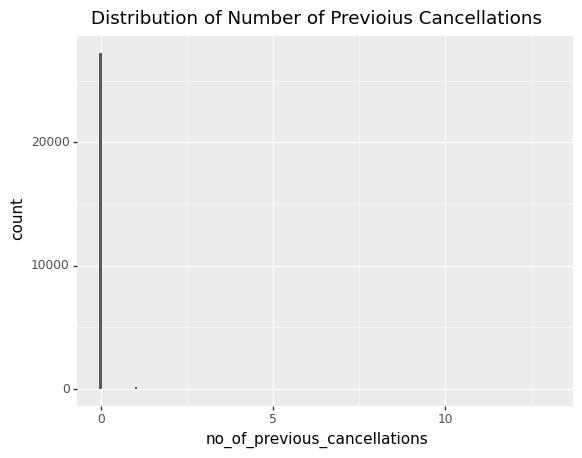

<ggplot: (8738799194305)>

In [89]:
p9.ggplot(hotels) + p9.aes(x='no_of_previous_cancellations') + p9.geom_histogram() + p9.labs(title='Distribution of Number of Previoius Cancellations')

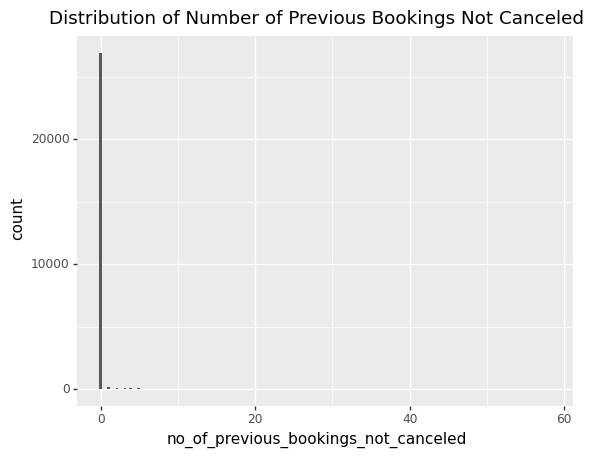

<ggplot: (8738799157023)>

In [90]:
p9.ggplot(hotels) + p9.aes(x='no_of_previous_bookings_not_canceled') + p9.geom_histogram() + p9.labs(title='Distribution of Number of Previous Bookings Not Canceled')

There is a large imbalance in the number of previous cancellations and the number of previous bookings not canceled.

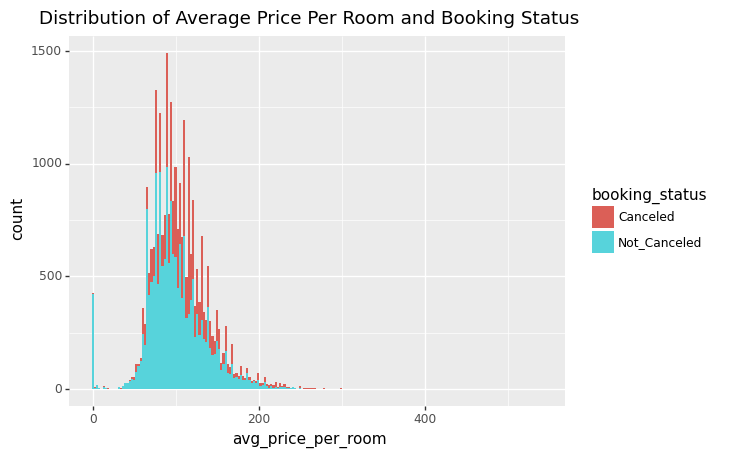

<ggplot: (8738799749054)>

In [91]:
p9.ggplot(hotels) + p9.aes(x='avg_price_per_room', fill='booking_status') + p9.geom_histogram() + p9.labs(title='Distribution of Average Price Per Room and Booking Status')

There is a considerable amount of reservations with an average price per room of 0 dollars. It's unsure if this is a data quality issue, or if it's listed as 0 dollars due to a promotion. For this analysis, those values will be left in the data. 

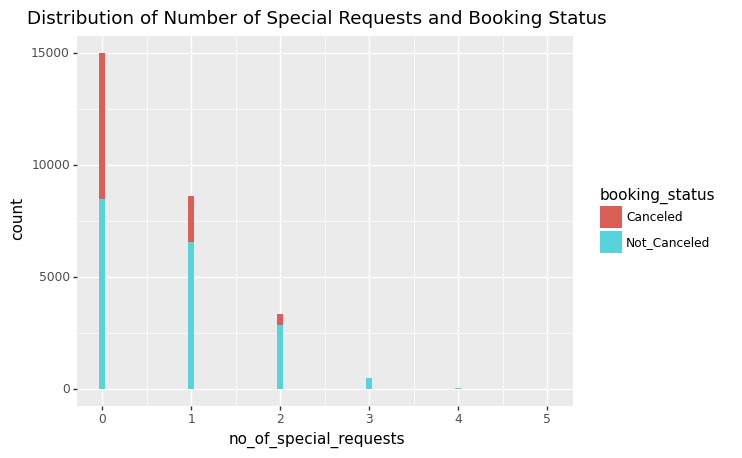

<ggplot: (8738800248679)>

In [92]:
p9.ggplot(hotels) + p9.aes(x='no_of_special_requests', fill='booking_status') + p9.geom_histogram() + p9.labs(title='Distribution of Number of Special Requests and Booking Status')

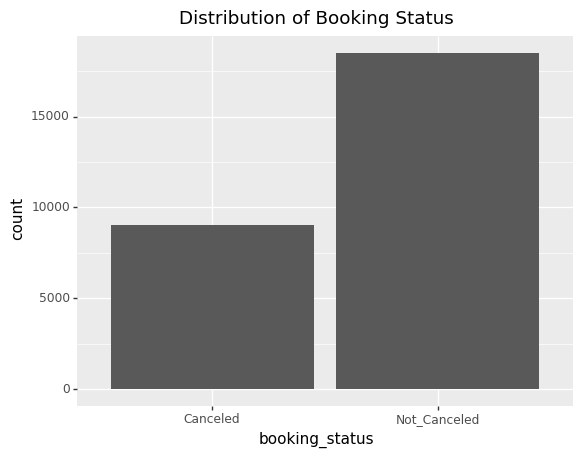

<ggplot: (8738800145487)>

In [93]:
p9.ggplot(hotels) + p9.aes(x='booking_status') + p9.geom_bar() + p9.labs(title='Distribution of Booking Status')

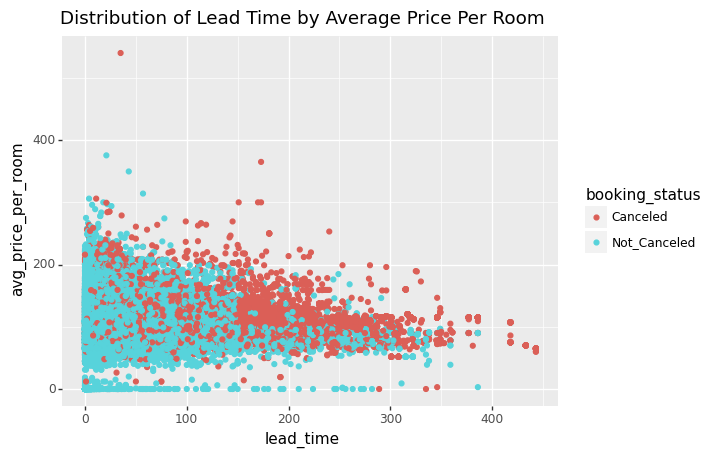

<ggplot: (8738800219212)>

In [94]:
p9.ggplot(hotels) + p9.aes(x='lead_time', y='avg_price_per_room', color='booking_status') + p9.geom_point() + p9.labs(title='Distribution of Lead Time by Average Price Per Room')

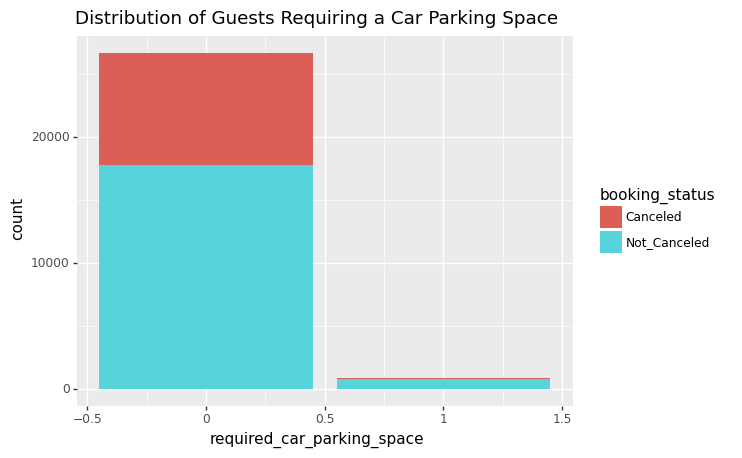

<ggplot: (8738800300641)>

In [95]:
p9.ggplot(hotels) + p9.aes(x='required_car_parking_space', fill='booking_status') + p9.geom_bar() + p9.labs(title='Distribution of Guests Requiring a Car Parking Space')

There is a large imbalance in those who require a car parking space.

## Distribution of Data

From initial exploratory data analysis it seems number of children, guests requiring a car parking space, meal plan, room type, market segment, repeated guests, number of bookings not canceled, and number of previous cancelations may have too much of an inbalance to be use in a machine learning model.

In [96]:
hotels.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [97]:
dummies_type_of_meal_plan = pd.get_dummies(hotels['type_of_meal_plan'])
dummies_type_of_meal_plan = dummies_type_of_meal_plan.drop('Meal Plan 2', axis=1)
dummies_type_of_meal_plan = dummies_type_of_meal_plan.rename(columns={'Meal Plan 1' : 'meal_plan_1', 'Meal Plan 3' : 'meal_plan_3', 'Not Selected' : 'meal_plan_not_selected'})
hotels = hotels.join(dummies_type_of_meal_plan)

In [98]:
dummies_room_type_reserved = pd.get_dummies(hotels['room_type_reserved'])
dummies_room_type_reserved = dummies_room_type_reserved.drop('Room_Type 6', axis=1)
dummies_room_type_reserved = dummies_room_type_reserved.rename(columns={'Room_Type 1' : 'room_type_1', 'Room_Type 2' : 'room_type_2', 'Room_Type 3' : 'room_type_3', 'Room_Type 4' : 'room_type_4', 'Room_Type 5' : 'room_type_5', 'Room_Type 7' : 'room_type_7'})
hotels = hotels.join(dummies_room_type_reserved)

In [99]:
dummies_market_segment_type = pd.get_dummies(hotels['market_segment_type'])
dummies_market_segment_type = dummies_market_segment_type.drop('Offline', axis=1)
dummies_market_segment_type = dummies_market_segment_type.rename(columns={'Complementary' : 'market_segment_complementary', 'Corporate' : 'market_segment_corporate', 'Aviation' : 'market_segment_aviation', 'Online' : 'market_segment_online'})
hotels = hotels.join(dummies_market_segment_type)

In [100]:
hotels['booking_status'] = hotels['booking_status'].map({'Canceled' : 1, 'Not_Canceled' : 0})

In [101]:
hotels.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'meal_plan_1', 'meal_plan_3', 'meal_plan_not_selected', 'room_type_1',
       'room_type_2', 'room_type_3', 'room_type_4', 'room_type_5',
       'room_type_7', 'market_segment_aviation',
       'market_segment_complementary', 'market_segment_corporate',
       'market_segment_online'],
      dtype='object')

In [102]:
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,meal_plan_1,meal_plan_3,meal_plan_not_selected,room_type_1,room_type_2,room_type_3,room_type_4,room_type_5,room_type_7,market_segment_aviation,market_segment_complementary,market_segment_corporate,market_segment_online
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,1,1,0,0,1,0,0,0,0,0,0,0,0,1
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,1,1,0,0,1,0,0,0,0,0,0,0,0,1
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
5,INN00006,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,346.0,2018.0,9.0,13.0,Online,0.0,0.0,0.0,115.00,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [103]:
drop = ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
#'required_car_parking_space', 'arrival_year', 'arrival_date', 'repeated_guest', 'no_of_weekend_nights', 'no_of_week_nights', 'no_of_previous_bookings_not_canceled'
X = hotels.drop(drop, axis=1)
y = hotels['booking_status']
features = X.columns
skbest = SelectKBest(score_func=f_classif, k='all')

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27511 entries, 1 to 36273
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          27511 non-null  float64
 1   no_of_children                        27511 non-null  float64
 2   no_of_weekend_nights                  27511 non-null  float64
 3   no_of_week_nights                     27511 non-null  float64
 4   required_car_parking_space            27511 non-null  float64
 5   lead_time                             27511 non-null  float64
 6   arrival_year                          27511 non-null  float64
 7   arrival_month                         27511 non-null  float64
 8   arrival_date                          27511 non-null  float64
 9   repeated_guest                        27511 non-null  float64
 10  no_of_previous_cancellations          27511 non-null  float64
 11  no_of_previous_

In [105]:
X.dropna(inplace=True)

In [106]:
skbest.fit_transform(X,y)
p_vals = pd.DataFrame({'Features' : features, 'p_value' : skbest.pvalues_}).sort_values('p_value')
keep_features = p_vals[p_vals['p_value'] < 0.05]
print(keep_features)

                                Features        p_value
13                no_of_special_requests   0.000000e+00
5                              lead_time   0.000000e+00
6                           arrival_year  3.901583e-197
12                    avg_price_per_room  2.636837e-125
25              market_segment_corporate   1.140955e-79
9                         repeated_guest   3.287471e-74
26                 market_segment_online   3.618047e-68
3                      no_of_week_nights   2.279084e-51
0                           no_of_adults   1.057830e-50
4             required_car_parking_space   2.534733e-46
24          market_segment_complementary   5.816368e-34
2                   no_of_weekend_nights   9.142457e-26
11  no_of_previous_bookings_not_canceled   9.223167e-24
14                           meal_plan_1   2.633005e-22
1                         no_of_children   4.358113e-09
10          no_of_previous_cancellations   2.584017e-08
17                           room_type_1   4.845

### Drop statistically insignificant features, feature sets, and imbalanced data.

In [107]:
# Drop meal plans
X.drop('meal_plan_1', axis=1, inplace=True)
X.drop('meal_plan_3', axis=1, inplace=True)
X.drop('meal_plan_not_selected', axis=1, inplace=True)

# Drop room types
X.drop('room_type_1', axis=1, inplace=True)
X.drop('room_type_2', axis=1, inplace=True)
X.drop('room_type_3', axis=1, inplace=True)
X.drop('room_type_4', axis=1, inplace=True)
X.drop('room_type_5', axis=1, inplace=True)
X.drop('room_type_7', axis=1, inplace=True)

# Drop arrival date
X.drop('arrival_date', axis=1, inplace=True)

# Drop market segment
X.drop('market_segment_aviation', axis=1, inplace=True)
X.drop('market_segment_complementary', axis=1, inplace=True)
X.drop('market_segment_corporate', axis=1, inplace=True)
X.drop('market_segment_online', axis=1, inplace=True)

In [108]:
# DROP IMBALANCED DATA DETERMINED BY PREVIOUS EDA

X.drop('no_of_previous_bookings_not_canceled', axis=1, inplace=True)
X.drop('no_of_previous_cancellations', axis=1, inplace=True)
X.drop('repeated_guest', axis=1, inplace=True)
X.drop('no_of_children', axis=1, inplace=True)
X.drop('required_car_parking_space', axis=1, inplace=True)

# Checking for collinearity.

The explanatory variables are checked for multicollinearity to help prevent overfitting of the data. Generally, we're looking for VIF Scores below 10. Each feature or feature set is removed on a stepwise basis, as removing one feature can have an impact on the VIF Score of other features. 

In [109]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_Value'] = [variance_inflation_factor(dataset.values, i) for i in range(len(dataset.columns))]
    return vif

In [110]:
calculate_vif(X)

,Features,VIF_Value
0,no_of_adults,15.872844
1,no_of_weekend_nights,1.958287
2,no_of_week_nights,3.659444
3,lead_time,2.130385
4,arrival_year,24.418348
5,arrival_month,7.135843
6,avg_price_per_room,10.877456
7,no_of_special_requests,1.767932


In [111]:
X.drop('arrival_year', axis=1, inplace=True)
calculate_vif(X)

,Features,VIF_Value
0,no_of_adults,11.562875
1,no_of_weekend_nights,1.939008
2,no_of_week_nights,3.512979
3,lead_time,2.121259
4,arrival_month,5.770098
5,avg_price_per_room,9.158404
6,no_of_special_requests,1.756642


In [112]:
X.drop('no_of_adults', axis=1, inplace=True)
calculate_vif(X)

,Features,VIF_Value
0,no_of_weekend_nights,1.883798
1,no_of_week_nights,3.371625
2,lead_time,2.046126
3,arrival_month,5.353350
4,avg_price_per_room,5.626285
5,no_of_special_requests,1.728279


# Preparing the model

In [113]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=888)

In [114]:
# Create the steps for the pipeline
steps = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors" : np.arange(1, 50)}

cross_val = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1, cv=10)
cross_val.fit(X_train, y_train)

y_pred = cross_val.predict(X_test)

# Evaluating the model

In [115]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

print("Best Estimator: ", cross_val.best_estimator_)
print("Best Parameters: ", cross_val.best_params_)
print("Best Score: ", cross_val.best_score_)

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Mean Absolute Error:  0.1524622932945666
Mean Squared Error:  0.1524622932945666
Best Estimator:  Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=8))])
Best Parameters:  {'knn__n_neighbors': 8}
Best Score:  0.838604167527157
Confusion Matrix:  [[3481  220]
 [ 619 1183]]


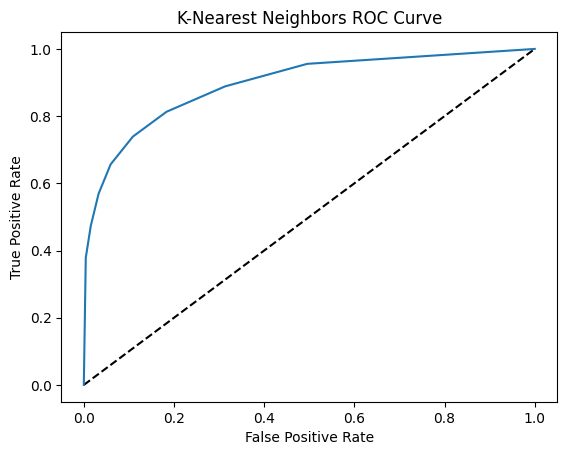

AUC:  0.8950741782899962


In [116]:
y_pred_proba = cross_val.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr, label = "K-Nearest Neighbors")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("K-Nearest Neighbors ROC Curve")
plt.show()

print("AUC: ", roc_auc_score(y_test, y_pred_proba))

To analyze the ROC Curve, you measure how close the solid line is to the top-left corner of the graph. The closer the Reciever Operating Curve is to the top-left corner, the better the model is at predicting true positive cancelations compared to false positive cancelations. 

The dotted line through the middle of the graph displays a random chance (50%) of deciding if the reservation would be canceled or not - equivalent to a coin flip. Above the line predicts higher than random chance and is a sign that the machine learning model is performing better than random chance. Below the line would indicate the model performed worse than random chance (a coin flip would be a better predictor). 

In [117]:
n_neighbors = np.arange(1,50)

train_accuracies = {}
test_accuracies = {}

for neighbor in n_neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor, n_jobs=-1)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(n_neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] 
 {1: 0.9890039985459833, 2: 0.9035350781533987, 3: 0.8944474736459469, 4: 0.8691384950926936, 5: 0.8655943293347873, 6: 0.8517357324609233, 7: 0.8505543438749545, 8: 0.8428298800436205, 9: 0.8412849872773537, 10: 0.8340149036713922, 11: 0.8332424572882589, 12: 0.8271992002908033, 13: 0.8293802253725918, 14: 0.8242457288258815, 15: 0.821882951653944, 16: 0.8189749182115594, 17: 0.8195656125045439, 18: 0.815748818611414, 19: 0.8162940748818611, 20: 0.8142948018902217, 21: 0.8143856779352963, 22: 0.8129770992366412, 23: 0.8119320247182843, 24: 0.8102053798618684, 25: 0.8087059251181389, 26: 0.8068429661941112, 27: 0.8070701563067976, 28: 0.8059796437659033, 29: 0.804889131225009, 30: 0.8028444202108325, 31: 0.8028444202108325, 32: 0.8001181388585968, 33: 0.8001181388585968, 34: 0.79907306434024, 35: 0.7984369320247183, 36: 0.79811886586695

Text(0, 0.5, 'Accuracy')

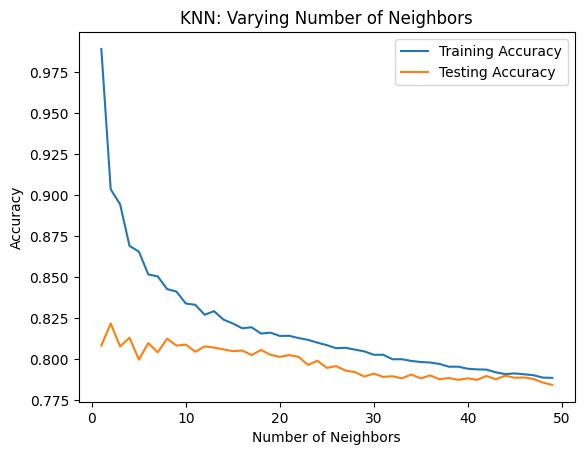

In [118]:
# Check for overfitting
plt.title("KNN: Varying Number of Neighbors")
plt.plot(n_neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(n_neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

In [119]:
# Comparing training and testing accuracies
print("Training Accuracy: ", cross_val.score(X_train, y_train))
print("Testing Accuracy: ", cross_val.score(X_test, y_test))

Training Accuracy:  0.8661850236277717
Testing Accuracy:  0.8475377067054334


We can determine there is some, although minimal, multicollinearity between the explanatory features by comparing the performance of the model on the training data set versus the testing data set. Although some is present, it's not enough to cause major overfitting of the data.

In [120]:
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'])

X_test_df.reset_index(inplace=True, drop=True)
y_test_df.reset_index(inplace=True, drop=True)
y_pred_df.reset_index(inplace=True, drop=True)

hotels_knn_spreadsheet = pd.concat([y_pred_df, y_test_df, X_test_df], axis=1)

hotels_knn_spreadsheet

,prediction,booking_status,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_month,avg_price_per_room,no_of_special_requests
0,0,0,0.0,1.0,3.0,11.0,77.60,0.0
1,1,1,0.0,4.0,232.0,7.0,100.75,1.0
2,0,0,2.0,1.0,2.0,12.0,109.00,1.0
3,0,0,0.0,2.0,12.0,8.0,150.50,1.0
4,0,0,0.0,1.0,13.0,8.0,151.00,1.0
...,...,...,...,...,...,...,...,...
5498,0,0,1.0,0.0,4.0,1.0,59.00,0.0
5499,0,0,2.0,2.0,47.0,4.0,132.60,2.0
5500,0,0,2.0,2.0,25.0,11.0,100.30,0.0
5501,1,1,0.0,1.0,182.0,10.0,120.00,1.0


In [121]:
hotels_knn_spreadsheet['booking_status'] = hotels_knn_spreadsheet['booking_status'].replace({0 : 'Not Canceled', 1 : 'Canceled'})
hotels_knn_spreadsheet['prediction'] = hotels_knn_spreadsheet['prediction'].replace({0 : 'Not Canceled', 1 : 'Canceled'})

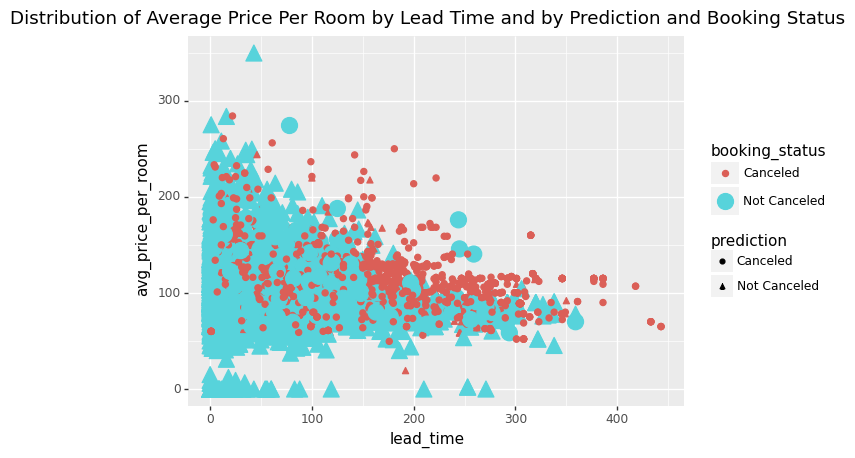

<ggplot: (8738797093084)>

In [122]:
# hotels_knn_spreadsheet['prediction'] = hotels_knn_spreadsheet['prediction'].astype(bool)
# hotels_knn_spreadsheet['booking_status']

p9.ggplot(hotels_knn_spreadsheet) + p9.aes(x='lead_time', y='avg_price_per_room', color='booking_status', shape='prediction', size='booking_status') + p9.geom_point() + p9.labs(title='Distribution of Average Price Per Room by Lead Time and by Prediction and Booking Status') 

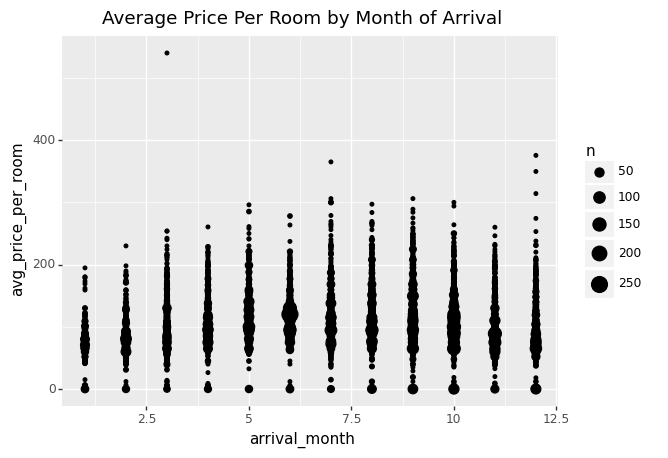

<ggplot: (8738797097626)>

In [123]:
p9.ggplot(hotels) + p9.aes(x='arrival_month', y='avg_price_per_room') + p9.geom_count() + p9.labs(title='Average Price Per Room by Month of Arrival')

# Results

Based on the analysis, we can see the following features are significant predictors in hotel reservation cancelations:

* number of special requests
* lead time
* average price per room
* number of weeknights
* number of weekend nights
* month of arrival

# Recommendations

By analyzing these features, we can predict hotel cancelations with 84% accuracy. With this information we can identify how many reservations that are likely to be canceled and optimize hotel occupancy by strategically overbooking part of the rooms identified as being canceled. 

From this analysis we can make general observations about the patterns in the data. Generally:
* More special requests are less likely to be canceled.
* Larger lead times are more likely to be canceled_ than those with shorter lead times. 
* Arrival times between November and Februrary are less likely to be canceled than reservations between June and October.
* Weeknight are more likely to be canceled than Weekend nights.

This analyst recommends running this machine learning model when the hotel is at capacity to better determine how many reservations are predicted to be canceled. If the hotel utilized this machine learning model to overbook up to 50% of the predicted cancelations, it could potentiall reclame 175,000 dollars in lost revenue during the month of October alone based on average price about 175 dollars per night and 1,000 reclaimed bookings. 

The machine learning algorythm could also be used to focus efforts on identifing customers that are likely to cancel to sell them cancelation insurance. Those customers who are predicted to cancel could be sold a premium so the hotel has less risk in reserving a room for them. 

One might recommend the hotel to limit how far in advanced (lead_time) the guest can book their reservation, however that could have severe negative impacts, and this is not recommend by the analyst. At this time, it's not recommended to reduce cancelations, but to expect them and compensate for them. 

This analyst also recommends further analysis in additional machine learning methods, further data collection outside the current scope of the data set, and to experiment with different data cleaning methods. 

# Limitations

One limitation of this analysis is the ability to determine when a reservation was canceled. Because of this, it's unsure how far in advanced the reservations were canceled. It would add value to understand how close to their scheduled arrival data the reservations were canceled: Reservations canceled months in advanced are less urgent in trying to fill those rooms versus last minute cancelations. 

A second limitation of this analysis is in the data collection method. This analyst did not collect the data themselves, and are limited in their background knowledge on the methods to collect the data. Additinaly, this analyst would like to see additional data like demographic data, length of stay, weather, distance from home, maximum hotel occupancy, and if the guests are flying to the destination to help determine booking status. 

A third limitation of this analysis the decision to remove all null data. This analyst decided to remove all null for the K-Nearest Neighbor's Machine Learning Model instead of using imputation methods. While this data set has a large amount of obervations totaling over 36,000, 8,762 observations were removed due to containing null values. This opens oportunity for addition bias to enter the analysis. This method of dealing with missing data could introduce bias into the analysis and it's unsure if the data is missing not at random. 

A fourth limiation of the analysis is that correlation does not equal causation. It's unsure the direction of the relationships between the target variable and the explanatory variables, and what additional external factors play a part in the relationship between the variables. 